J'ai transposé le TP qu'on a fait en R en un notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kernels import *

J'ai mis tous les noyaux dans un fichier python. Comme ça si on en rajoute on les met tous là bas.

In [2]:
x=np.linspace(-1,1,200)

def Simulateur(x):
  return np.sin(2*np.pi*x)+x**2

y=Simulateur(x)

J'ai aussi mis condMean et CondVar dans le fichier .py .

C:\Users\sliss\AppData\Local\Temp\ipykernel_62164\1045551548.py:11: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(np.diag(Var))


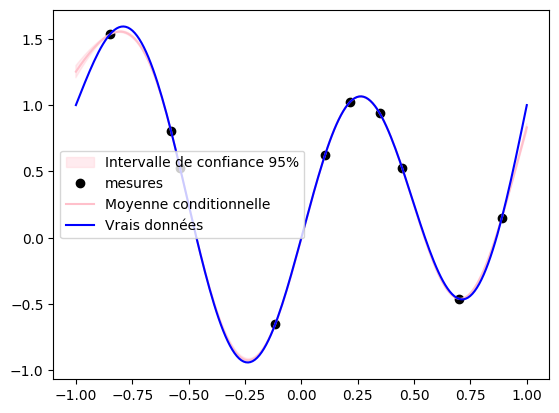

In [3]:
p=10                                                          #nombre de mesures que l'on fait
indices = np.random.choice(len(x), size=p, replace=False)    #Je trouve cool de prendre des points au hasard
X = x[indices]
Y=Simulateur(X)

sigma=1
theta=0.3

Mean = condMean(x,X,Y,mat5_2Kern,[sigma,theta])
Var = condVar(x,X,Y,mat5_2Kern,[sigma,theta])
std = np.sqrt(np.diag(Var))

upper=Mean+1.96*std
lower=Mean-1.96*std

plt.fill_between(x, lower, upper,color='pink', alpha=0.3,label='Intervalle de confiance 95%')
plt.plot(X,Y,'o',color='black',label='mesures')
plt.plot(x,Mean,color='pink',label='Moyenne conditionnelle')
plt.plot(x,y,color='blue',label='Vrais données')
plt.legend()

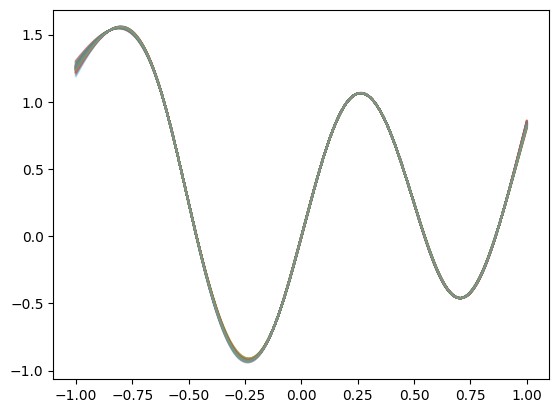

In [4]:
for i in range(100):
  tirage=np.random.multivariate_normal(mean=Mean, cov=Var)
  plt.plot(x,tirage,alpha=0.3)



### Test de la fonction RdKernel

In [25]:
x=np.array(([1,2,3],[3,4,5]))
y=np.array(([3,4,5],[1,2,3]))
param=[1,1]
res=RdKernel(x,y,param,expKern,"sum")
print(res)

[[0.03663128 0.36800285 1.00000011]
 [0.36800285 0.03663128 0.36800285]
 [1.00000011 0.36800285 0.03663128]]


In [24]:
xa = np.atleast_2d(x[0,:]).T
ya = np.atleast_2d(y[0,:])
a=np.exp(-abs(xa-ya)**2)
xb = np.atleast_2d(x[1,:]).T
yb = np.atleast_2d(y[1,:])
b=np.exp(-abs(xb-yb)**2)
print(a+b)


[[0.03663128 0.36800285 1.00000011]
 [0.36800285 0.03663128 0.36800285]
 [1.00000011 0.36800285 0.03663128]]


On retrouve exactement le même résultat que la fonction RdKernel. Tout du moins pour "sum", "product" renvoie la matrice nulle, surement un problème d'approximation car pour cet exemple les coeffs sont petits avec product.